In [23]:
import cv2

img = cv2.imread('Desktop/AI apps/makeup/saieh1.jpg')
cv2.imshow('image',img)
roi = cv2.selectROI('image',img,False)
crop_img = img[int(roi[1]):int(roi[1]+roi[3]),int(roi[0]):int(roi[0]+roi[2])]
cv2.imshow('cropped',crop_img)
cv2.imwrite('Desktop/AI apps/makeup/cropped.jpg',crop_img)
cv2.destroyAllWindows()

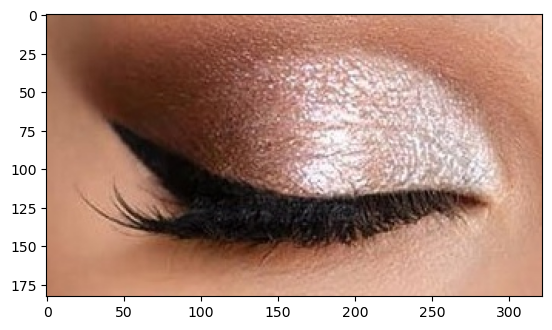

In [24]:
import matplotlib.pyplot as plt
img2 = cv2.imread("Desktop/AI apps/makeup/cropped.jpg")
plt.imshow(img2[...,::-1])

In [25]:
import numpy as np
from sklearn.cluster import KMeans

n_clusters = 5

#read image
img2 = cv2.imread("Desktop/AI apps/makeup/cropped.jpg")

#reshape to a list of pixels
flat_img = img2.reshape((-1, 3))

#using k-means to cluster pixels
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(flat_img)

#the cluster centers are our dominant colors.
dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

labels = kmeans.labels_

print(dominant_colors)
print(labels)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[108 131 186]
 [ 60  78 128]
 [148 166 211]
 [208 211 233]
 [ 21  29  50]]
[1 1 1 ... 2 2 2]


In [26]:
percentages = np.bincount(labels)/len(flat_img)
percentages

array([0.30178529, 0.16449445, 0.26134474, 0.09349014, 0.17888538])

In [27]:
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

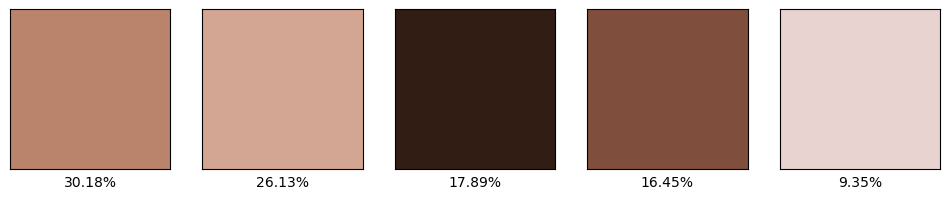

In [28]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(n_clusters):
    plt.subplot(1,n_clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

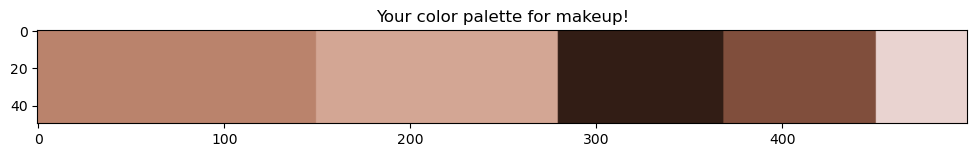

In [30]:
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Your color palette for makeup!')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*500)
    if i==n_clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)